In [27]:
import numpy as np
import cv2
import matplotlib.pylab as plt
import math
MINIMAP_SIZE = 170
VIDEO_FILE = "Ninja Myth Round 2.mp4"
FPS = 30
DISTANCE_THRESHOLD = 50

def extract_minimap(frame):
    minimap = np.zeros((MINIMAP_SIZE, MINIMAP_SIZE, 3), np.dtype('uint8'))
    for i in range(MINIMAP_SIZE):
        for j in range(MINIMAP_SIZE):
            for k in range(3):
                minimap[i][j][k] = frame[17 + i][1090 + j][k]
    return minimap

def convert_to_greenscale(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j][0] = 0
            img[i][j][2] = 0
    return img

def convert_to_greenscale_minimap(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i][j][0] > 140 and img[i][j][2] > 140):
                img[i][j][1] = int(img[i][j][1] * 2)
            img[i][j][0] = 0
            img[i][j][2] = 0
    return img


def distance(loc1, loc2):
    diff1 = loc1[0] - loc2[0]
    diff2 = loc1[1] - loc2[1]
    return math.sqrt(diff1 * diff1 + diff2 * diff2)



In [34]:
s4map = cv2.imread('Fortnite-map-season4-high-res.jpg', cv2.IMREAD_COLOR)
s4map_3k = cv2.imread('Fortnite s4map 3k.jpg', cv2.IMREAD_COLOR)
test5x5 = cv2.imread('test5x5.jpg', cv2.IMREAD_COLOR)
test2x2 = cv2.imread('testTile2x2.jpg', cv2.IMREAD_COLOR)
testTile = cv2.imread('test tile.jpg', cv2.IMREAD_COLOR)
checked = np.zeros((s4map.shape[0], s4map.shape[1]))

(2183, 2217)


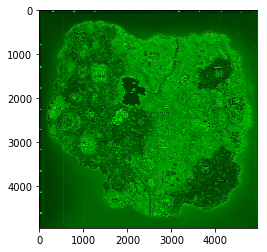

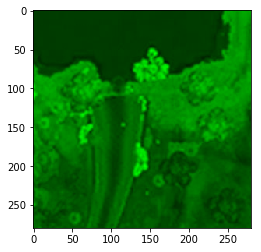

In [2]:
res = cv2.matchTemplate(s4map, testTile, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = (top_left[0] + 280, top_left[1] + 280)
actual_loc = (top_left[0] + 140, top_left[1] + 140)
print(actual_loc)

plt.imshow(s4map)
plt.show()
plt.imshow(testTile)
plt.show()

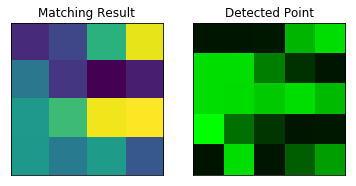

(2, 1)
(2, 1)


In [3]:
res = cv2.matchTemplate(test5x5,test2x2,cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = (top_left[0] + 2, top_left[1] + 2)
#cv2.rectangle(test5x5,top_left, bottom_right, 255, 2)

plt.subplot(121),plt.imshow(res)
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test5x5)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()
print(top_left)
print(min_loc)

In [ ]:
import os

def video_to_frames(video, path_output_dir):
    # extract frames from a video and save to directory as 'x.png' where 
    # x is the frame index
    vidcap = cv2.VideoCapture(video)
    count = 0
    while vidcap.isOpened():
        success, image = vidcap.read()
        if success:
            cv2.imwrite(os.path.join(path_output_dir, '%d.png') % count, image)
            count += 1
        else:
            break
    cv2.destroyAllWindows()
    vidcap.release()


In [4]:
cap = cv2.VideoCapture("Fortnite Videos/" + VIDEO_FILE)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
seconds = frameCount / 30
buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

print(frameCount)
print(frameWidth)
print(frameHeight)

fc = 0
ret = True

for i in range(35000):
    if (i % 30 == 0):
        ret, buf[fc] = cap.read()
    else:
        cap.read()
    fc += 1
    if (fc % 1000 == 0):
        print(fc)

cap.release()


35685
1280
720
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000


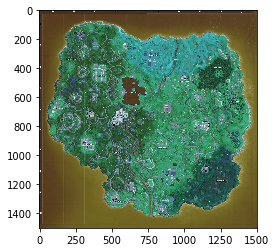

75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450


In [36]:
plt.imshow(s4map_3k)
plt.show()
file = open(VIDEO_FILE + " data.txt", "w")
old_loc = (-1, -1)

for i in range(75, 460):
    minimap = extract_minimap(buf[i * 30])
    #print(minimap[20][75], minimap[20][126])
    res = cv2.matchTemplate(s4map_3k, minimap, cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = min_loc
    bottom_right = (top_left[0] + MINIMAP_SIZE, top_left[1] + MINIMAP_SIZE)
    actual_loc = (top_left[0] + MINIMAP_SIZE/2, top_left[1] + MINIMAP_SIZE/2)
    #plt.imshow(minimap)
    #plt.show()
    if (old_loc[0] == -1 or distance(old_loc, actual_loc) < DISTANCE_THRESHOLD):
        file.write(str(i) + "," + str(actual_loc[0]) + "," + str(actual_loc[1]) + "\n")
        old_loc = actual_loc
        #print(actual_loc)
    else:
        #print(old_loc)
        file.write(str(i) + "," + str(old_loc[0]) + "," + str(old_loc[1]) + "\n")
    if (i % 25 == 0):
        print(i)
    
file.close()

In [ ]:
buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

cv2.namedWindow('frame 10')
cv2.imshow('frame 10', buf[9])

cv2.waitKey(0)